# 3D Tetrakis Lattice: Node and Edge Visualization

**Purpose:**  
This notebook demonstrates the construction and visualization of a three-dimensional tetrakis-square lattice using the custom `tetrakis_sim` Python package. The main goals are to verify the lattice generation code, visually inspect the node structure, and illustrate how the lattice is organized in 3D space.

**Parameters:**
- **Grid Size (`size`):** 4  
  The lattice is constructed as a 4 × 4 grid in the horizontal (row and column) dimensions.
- **Layers (`layers`):** 3  
  There are 3 stacked layers (z-dimension), making this a true 3D lattice.
- **Lattice Type (`dim`):** 3  
  Indicates that a 3D tetrakis lattice is built.

**What is being visualized:**  
- The **first plot** shows all the nodes of the 3D lattice as blue points in a 3D coordinate system. Each point represents one of the subnodes ("A", "B", "C", or "D") in every cell across all layers.
- The **second plot** overlays a random sample of lattice edges on top of the nodes. This helps reveal the 3D connectivity of the lattice without overwhelming the viewer with the full edge set.

**Observations:**  
- The 3D grid structure is clearly visible, with regular spacing of nodes in all three dimensions.
- Sampled edges make it easier to perceive the network structure without cluttering the visualization.
- This demonstration confirms that the 3D lattice-building function produces the expected graph and is ready for further experiments (such as introducing defects or simulating physics).

**Next steps:**  
- Explore larger lattices and more layers.
- Add and visualize defects (e.g., wedges or “black holes”).
- Simulate wave propagation or shortest paths on the 3D structure.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Always run this cell first in any project notebook!
import os, sys

def find_and_set_project_root(project_name="tetrakis-sim"):
    cur = os.getcwd()
    while os.path.basename(cur) != project_name:
        parent = os.path.dirname(cur)
        if parent == cur:
            raise RuntimeError(f"Project root '{project_name}' not found!")
        cur = parent
    os.chdir(cur)
    if cur not in sys.path:
        sys.path.insert(0, cur)
    print("Project root set to:", cur)

find_and_set_project_root()


Project root set to: /Users/MWL/Desktop/tetrakis-sim


In [3]:
from tetrakis_sim.lattice import build_sheet
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Build a small 3D tetrakis lattice
size = 4
layers = 3
G = build_sheet(size=size, dim=3, layers=layers)
print(f"3D Lattice: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


3D Lattice: 192 nodes, 992 edges


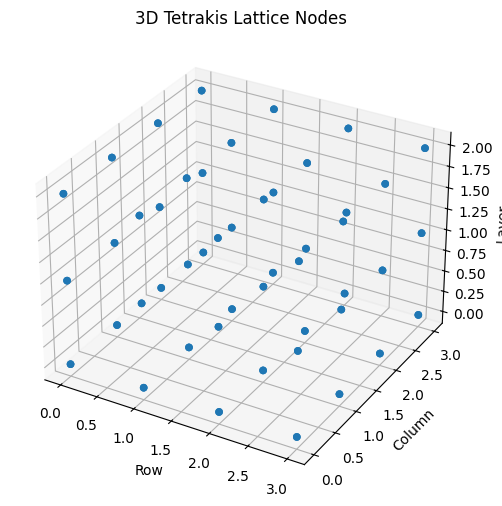

In [4]:
def node_coords_3d(node):
    r, c, z, q = node
    return r, c, z

coords = [node_coords_3d(n) for n in G.nodes]
xs, ys, zs = zip(*coords)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=20, alpha=0.7)

ax.set_title("3D Tetrakis Lattice Nodes")
ax.set_xlabel("Row")
ax.set_ylabel("Column")
ax.set_zlabel("Layer")
plt.show()


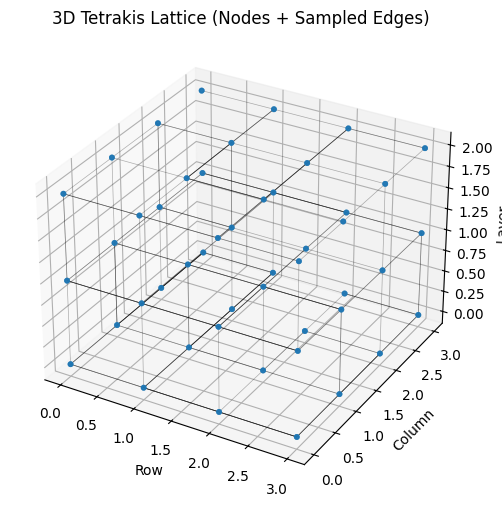

In [5]:
import random
sample_edges = random.sample(list(G.edges), min(200, G.number_of_edges()))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=10, alpha=0.5)

for u, v in sample_edges:
    x = [u[0], v[0]]
    y = [u[1], v[1]]
    z = [u[2], v[2]]
    ax.plot(x, y, z, color='k', linewidth=0.5, alpha=0.3)

ax.set_title("3D Tetrakis Lattice (Nodes + Sampled Edges)")
ax.set_xlabel("Row")
ax.set_ylabel("Column")
ax.set_zlabel("Layer")
plt.show()
